# Capstone Project

Network Model


In [1]:
# The library
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as mp
from sklearn.linear_model import LinearRegression as lr
import numpy as np
import ipywidgets as wg

In [2]:
# Read CSV file without header
df = pd.read_csv("CapstoneProject_Dataset.csv", header= None)

In [4]:
# Add header row
df.columns = ['City', 'State', 'Provider_number', 'Distinct_Referral_Pairs', 'Referral_Volume', 'Total_Num_Referral_Triples_sum']

In [5]:
# Display DataFrame with header
df

,City,State,Provider_number,Distinct_Referral_Pairs,Referral_Volume,Total_Num_Referral_Triples_sum
0,ABBEVILLE,ALABAMA,5,32,31345,32
1,ABBEVILLE,LOUISIANA,38,347,122187,347
2,ABBEVILLE,SOUTH CAROLINA,17,141,67245,141
3,ABERDEEN,IDAHO,1,1,109,1
4,ABERDEEN,MARYLAND,21,53,19473,53
...,...,...,...,...,...,...
10394,ZION,ILLINOIS,16,57,12979,57
10395,ZIONSVILLE,INDIANA,17,31,2765,31
10396,ZUMBROTA,MINNESOTA,2,4,358,4
10397,ZUNI,NEW MEXICO,11,46,12500,46


In [6]:
# Save the DataFrame to a new CSV file
df.to_csv('Capstone_data_withheader.csv', index=False)

In [7]:
# Exclude all cities where the sum of the field that counts the triples of providers and clients is less than 11
df = df[df['Total_Num_Referral_Triples_sum'] > 10]

## The Dataset
Using line regression I will investigate three possible relationships between the number of providers
and distinct refferal pairs:
* A linear relationship
* A quadratic relationship
* A log-linear relationship


## Fit the Linear Model
We are using the Linear Regression object that we aliased as `lr` during the import. 
Our first linear regression investigates the number of distinct refferal pairs as a function of the number of providers.
$$
\operatorname{\mathbb{E}}[\text{Distinct Refferal Pairs}] = a \times \text{Number of providers} + b
$$
In this model, the slope $a$ is the number of Distinct Refferal Pairs provided by each
provider, while the intercept $b$ is a baseline Distinct Refferal Pairs for a city with no provider.

In [8]:
# Fit the linear model
linear_network = lr().fit(
    X = df["Provider_number"].values.reshape(-1, 1),
    y = df["Distinct_Referral_Pairs"].values
)

# Print coefficients and intercept for the linear Network model
print(f"Intercept for Linear Network: {linear_network.intercept_}")
print(f"Coefficient for Linear Network: {linear_network.coef_[0]}")

Intercept for Linear Network: -414.9100182543343
Coefficient for Linear Network: 31.8987523643023


In [9]:
# Compute Pearson correlation coefficient
pearson_corr = np.corrcoef(df["Provider_number"], df["Distinct_Referral_Pairs"])[0, 1]

# Compute Pearson's r^2 value
pearson_r2 = pearson_corr ** 2

print(f"Pearson's r^2 value: {pearson_r2:.2f}")

Pearson's r^2 value: 0.87


## Plot the Linear Fit


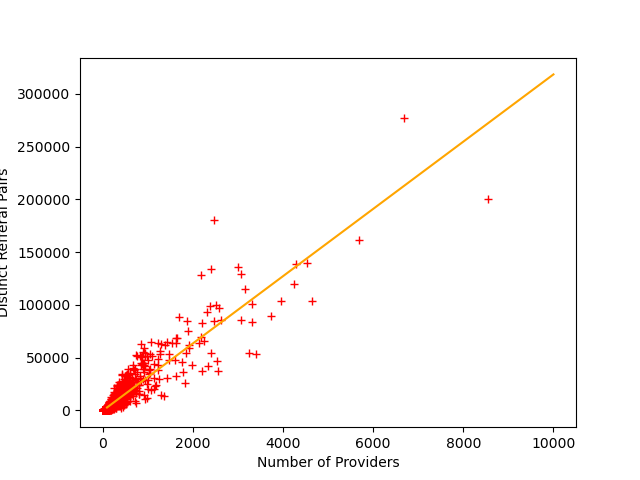

In [10]:
# Blank canvas
linearfg, linearax = mp.subplots()

# Label the axes
linearax.set_xlabel("Number of Providers")
linearax.set_ylabel("Distinct Refferal Pairs")

# The actual data
linearactual, = linearax.plot(
    df["Provider_number"],
    df["Distinct_Referral_Pairs"],
    "+r"
)

# The best fit line for Linear Model
xticks = np.linspace(10000, 100)
linearexpect, = linearax.plot(
    xticks,
    linear_network.predict(xticks.reshape(-1, 1)),
    "orange"
)

## Fit the Quadratic Model

Our next linear regression investigates the number of distinct refferal pairs as a function of the square of the number of providers.
$$
\operatorname{\mathbb{E}}[\text{Distinct Refferal Pairs}] = a \times \text{Number of providers}^2 + b
$$
In this model, the slope $a$ is the number of Distinct Refferal Pairs provided by two
provider, while the intercept $b$ is a baseline Distinct Refferal Pairs for a city with no provider.

In [11]:
# Assign the result of fitting to the estimate2010 variable
quadratic_network = lr().fit(
    X = (df["Provider_number"].values**2).reshape(-1, 1),
    y = df["Distinct_Referral_Pairs"].values
)

# Take a look at the output
print(f"Intercept for the Quadratic Network: {quadratic_network.intercept_}")
print(f"Coefficient for the Quadratic Network: {quadratic_network.coef_[0]}")

Intercept for the Quadratic Network: 1918.266825651793
Coefficient for the Quadratic Network: 0.005534276083364312


In [12]:
# Predicting the target variable using the quadratic regression model
predicted_values = quadratic_network.predict((df["Provider_number"].values ** 2).reshape(-1, 1))

# Compute Pearson correlation coefficient
pearson_corr = np.corrcoef(df["Distinct_Referral_Pairs"].values, predicted_values)[0, 1]

# Compute Pearson's r^2 value
pearson_r2 = pearson_corr ** 2

print(f"Pearson's r^2 value for Quadratic Network: {pearson_r2:.2f}")

Pearson's r^2 value for Quadratic Network: 0.53


## Plot the Quadratic Fit


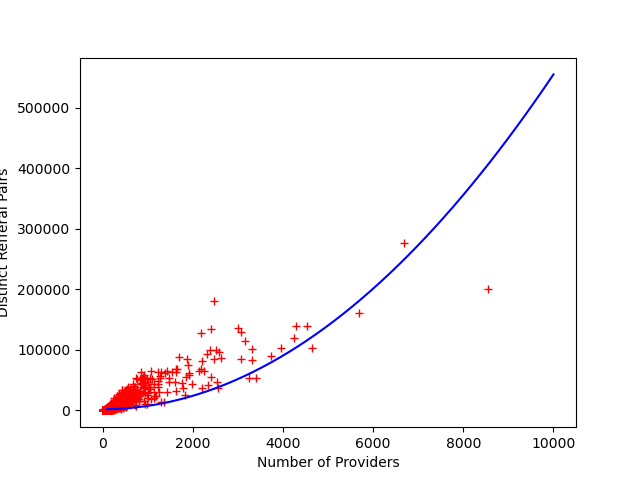

In [13]:
# Blank canvas
quadraticfg, quadraticax = mp.subplots()

# Label the axes
quadraticax.set_xlabel("Number of Providers")
quadraticax.set_ylabel("Distinct Refferal Pairs")

# The actual data. 
quadraticactual, = quadraticax.plot(
    df["Provider_number"],
    df["Distinct_Referral_Pairs"],
    "+r"
)

# The best fit line. 
xticks = np.linspace(10000, 100)
quadraticexpect, = quadraticax.plot(
    xticks,
    quadratic_network.predict((xticks**2).reshape(-1, 1)),
    "blue"
)


## Fit the Log-Linear Model
Our final linear regression investigates the number of distinct refferal pairs  as a function of the log-linear of the
the number of providers.
$$
\operatorname{\mathbb{E}}[\text{Distinct Refferal Pairs}] = a \times \text{Number of providers} \times \log(\text{Number of providers}) + b
$$

In this model the Linear Regression slope $a$ coefficient associated with the log-linear of the number of providers represents the change in the expected number of distinct referral pairs for a one-unit increase in the logarithm of the number of providers, and the intercept $b$ epresents the expected number of distinct referral pairs when the logarithm of the number of providers is zero


In [14]:

loglinear_network = lr().fit(
    X = (df["Provider_number"].values*np.log(df["Provider_number"].values)).reshape(-1, 1),
    y = df["Distinct_Referral_Pairs"].values
)

# Take a look at the output
print(f"Intercept: {loglinear_network.intercept_}")
print(f"Coefficient: {loglinear_network.coef_[0]}")

Intercept: 368.0228178429893
Coefficient: 3.920753097051211


In [15]:
# Predicting the target variable using the log-linear regression model
predicted_values = loglinear_network.predict((df["Provider_number"].values * np.log(df["Provider_number"].values)).reshape(-1, 1))

# Compute Pearson correlation coefficient
pearson_corr = np.corrcoef(df["Distinct_Referral_Pairs"].values, predicted_values)[0, 1]

# Compute Pearson's r^2 value
pearson_r2 = pearson_corr ** 2

print(f"Pearson's r^2 value for Log-Linear Network: {pearson_r2:.2f}")

Pearson's r^2 value for Log-Linear Network: 0.85


## Plot the Log-Linear Fit
Finally we include the log-linear model with the plot of the quadratic and linear model.

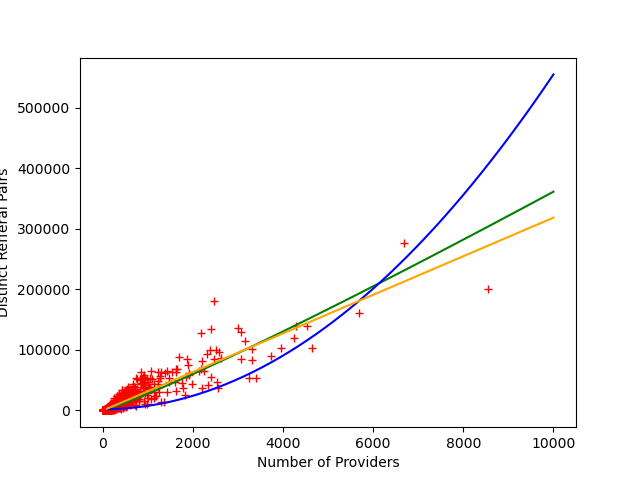

In [17]:
# Blank canvas
loglinearfg, loglinearax = mp.subplots()

# Label the axes
loglinearax.set_xlabel("Number of Providers")
loglinearax.set_ylabel("Distinct Refferal Pairs")

# The actual data.
loglinearactual, = loglinearax.plot(
    df["Provider_number"],
    df["Distinct_Referral_Pairs"],
    "+r"
)

# The best fit line..
xticks = np.linspace(10000, 100)
loglinearexpect, = loglinearax.plot(
    xticks,
    loglinear_network.predict((xticks*np.log(xticks)).reshape(-1, 1)),
    "green"
)
loglinearax.plot(
    xticks,
    quadratic_network.predict((xticks**2).reshape(-1, 1)),
    "blue"
)
loglinearax.plot(
    xticks,
    linear_network.predict(xticks.reshape(-1, 1)),
    "orange"
)

## Qualitative Diagnostics
We redraw our plot using a
log-log scale on the axes.


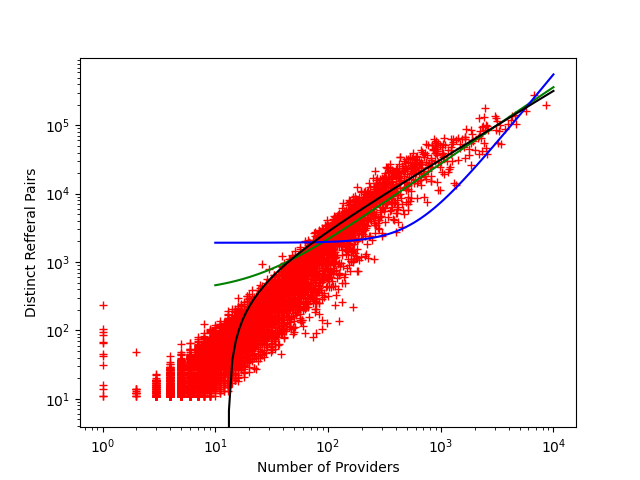

In [31]:
# Blank canvas
loglogfg, loglogax = mp.subplots()

# Label the axes
loglogax.set_xlabel("Number of Providers")
loglogax.set_ylabel("Distinct Refferal Pairs")

# The actual data. There is one point per nation.
loglogactual, = loglogax.loglog(
    df["Provider_number"],
    df["Distinct_Referral_Pairs"],
    "+r"
)

# The best fit line. 
xticks = 10**np.linspace(1, 4, 100)
loglogexpect, = loglogax.loglog(
    xticks,
    loglinear_network.predict((xticks*np.log(xticks)).reshape(-1, 1)),
    "green"
)
loglogax.loglog(
    xticks,
    quadratic_network.predict((xticks**2).reshape(-1, 1)),
    "blue"
)
loglogax.loglog(
    xticks,
    linear_network.predict(xticks.reshape(-1, 1)),
    "black"
)

In [21]:
import numpy as np
from sklearn.metrics import r2_score

# Calculate Pearson's r2 value for linear model
linear_predicted = linear_network.predict(df["Provider_number"].values.reshape(-1, 1))
linear_r2 = r2_score(df["Distinct_Referral_Pairs"].values, linear_predicted)

# Calculate Pearson's r2 value for quadratic model
quadratic_predicted = quadratic_network.predict((df["Provider_number"].values ** 2).reshape(-1, 1))
quadratic_r2 = r2_score(df["Distinct_Referral_Pairs"].values, quadratic_predicted)

# Calculate Pearson's r2 value for log-linear model
loglinear_predicted = loglinear_network.predict((df["Provider_number"].values * np.log(df["Provider_number"].values)).reshape(-1, 1))
loglinear_r2 = r2_score(df["Distinct_Referral_Pairs"].values, loglinear_predicted)

print(f"Pearson's r^2 value for Linear Network: {linear_r2:.2f}")
print(f"Pearson's r^2 value for Quadratic Network: {quadratic_r2:.2f}")
print(f"Pearson's r^2 value for Log-Linear Network: {loglinear_r2:.2f}")

Pearson's r^2 value for Linear Network: 0.87
Pearson's r^2 value for Quadratic Network: 0.53
Pearson's r^2 value for Log-Linear Network: 0.85


## Hypothesis Revision
From the log-log we can see that all the models fail for a city  with less than 10 number of providers.
The reason for this failure is our faulty assumption that the intercept $b$ is not
zero.

Lets rerun the models, asserting that the intercept is zero, and that all the data points
are positive.

In [25]:
linearrevised = lr(
    fit_intercept = False, # force interecept to be zero
    positive = True   # assume all the data is posoitive
).fit(
    X = df["Provider_number"].values.reshape(-1, 1),
    y = df["Distinct_Referral_Pairs"].values
)

# Take a look at the output
print("Linear network model")
print("--------------------")
print(f"Intercept: {linearrevised.intercept_}")
print(f"Coefficient: {linearrevised.coef_[0]}")
print()


quadraticrevised = lr(
    fit_intercept = False,  # force interecept to be zero
    positive = True
).fit(
    X = (df["Provider_number"].values**2).reshape(-1, 1),
    y = df["Distinct_Referral_Pairs"].values
)

# Take a look at the output
print("Quadratic netwrok model")
print("-----------------------")
print(f"Intercept: {quadraticrevised.intercept_}")
print(f"Coefficient: {quadraticrevised.coef_[0]}")
print()


loglinearrevised = lr(
    fit_intercept = False,  # force interecept to be zero
    positive = True
).fit(
    X = (df["Provider_number"].values*np.log(df["Provider_number"].values)).reshape(-1, 1),
    y = df["Distinct_Referral_Pairs"].values
)

# Take a look at the output
print("Log-Linear network model")
print("------------------------")
print(f"Intercept: {loglinearrevised.intercept_}")
print(f"Coefficient: {loglinearrevised.coef_[0]}") 

Linear network model
--------------------
Intercept: 0.0
Coefficient: 31.533723503204467

Quadratic netwrok model
-----------------------
Intercept: 0.0
Coefficient: 0.005637095057965133

Log-Linear network model
------------------------
Intercept: 0.0
Coefficient: 3.9518083578658767


## Rerun Diagnostics
Inspecting the coefficients of each model we can observe for each model:
* The linear model estimates that each provider provides $\approx 31 $ distinct referral pairs
* The log-linear model estimates that each degree of separation between a provider and
refferal generates $\approx 4 \times \log(10) = 5$  distinct referral pairs,
where we are assuming each provider knows on average $10$ refferal.
* The quadratic model estimates that each potential connection between two providers
provideses $\approx 0 $ distinct referral pairs. 

When we log-log plot the models we can see that both the linear and the log-linear models
estimate well, while the quadratic model is clearly a
poor estimator.

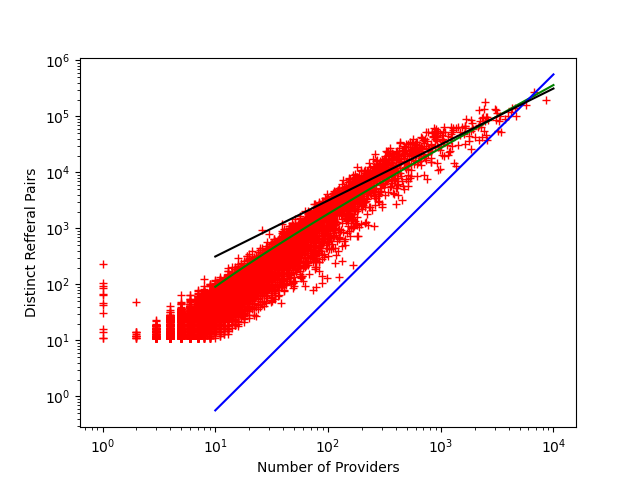

In [26]:
# Blank canvas
revisedfg, revisedax = mp.subplots()

# Label the axes
revisedax.set_xlabel("Number of Providers")
revisedax.set_ylabel("Distinct Refferal Pairs")

# The actual data. There is one point per nation.
revisedactual, = revisedax.loglog(
    df["Provider_number"],
    df["Distinct_Referral_Pairs"],
    "+r"
)

# The best fit line.
xticks = 10**np.linspace(1, 4, 100)
revisedexpect, = revisedax.loglog(
    xticks,
    loglinearrevised.predict((xticks*np.log(xticks)).reshape(-1, 1)),
    "green"
)
revisedax.loglog(
    xticks,
    quadraticrevised.predict((xticks**2).reshape(-1, 1)),
    "blue"
)
revisedax.loglog(
    xticks,
    linearrevised.predict(xticks.reshape(-1, 1)),
    "black"
)

In [30]:
import numpy as np
from sklearn.metrics import r2_score

# Calculate Pearson's r2 value for revised linear model
linear_predicted_revised = linearrevised.predict(df["Provider_number"].values.reshape(-1, 1))
linear_r2_revised = r2_score(df["Distinct_Referral_Pairs"].values, linear_predicted_revised)

# Calculate Pearson's r2 value for revised quadratic model
quadratic_predicted_revised = quadraticrevised.predict((df["Provider_number"].values ** 2).reshape(-1, 1))
quadratic_r2_revised = r2_score(df["Distinct_Referral_Pairs"].values, quadratic_predicted_revised)

# Calculate Pearson's r2 value for revised log-linear model
loglinear_predicted_revised = loglinearrevised.predict((df["Provider_number"].values * np.log(df["Provider_number"].values)).reshape(-1, 1))
loglinear_r2_revised = r2_score(df["Distinct_Referral_Pairs"].values, loglinear_predicted_revised)

print(f"Pearson's r^2 value for Revised Linear Network: {linear_r2_revised:.2f}")
print(f"Pearson's r^2 value for Revised Quadratic Network: {quadratic_r2_revised:.2f}")
print(f"Pearson's r^2 value for Revised Log-Linear Network: {loglinear_r2_revised:.2f}")

Pearson's r^2 value for Revised Linear Network: 0.87
Pearson's r^2 value for Revised Quadratic Network: 0.50
Pearson's r^2 value for Revised Log-Linear Network: 0.85
